## EDA for provider drug payments aggregate dataset

#### data read in from psql

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import psycopg2 as pg2

In [268]:
conn = pg2.connect(dbname='medicare', user='postgres')

In [269]:
query = '''
        SELECT *
        FROM npi_13;
        '''

In [270]:
df_npi = pd.read_sql_query(query, conn)

In [7]:
df_npi.head().T

,0,1,2,3,4
npi,1447268107,1174856348,1720181522,1821285826,1457520132
last_name,10 PARK PHARMACY INC.,"101 FAMILY MEDICAL GROUP,A PROFESSIONAL CORP","154ST STREET MEDICAL PLAZA, INC.",21ST CENTURY ONCOLOGY LLC,3 SUNS INVESTMENT INC
first_name,None,None,None,None,None
middle_initial,None,None,None,None,None
credentials,None,None,None,None,None
gender,None,None,None,None,None
entity_code,O,O,O,O,O
provider_street1,53 E 34TH ST,22030 SHERMAN WAY STE 101,5801 MIAMI LAKES DR E,21150 BISCAYNE BLVD,3136 SQUALICUM PKWY
prover_street2,None,None,None,SUITE 404,STE. B
provider_city,NEW YORK,CANOGA PARK,MIAMI LAKES,AVENTURA,BELLINGHAM


In [8]:
df_npi.describe().T

,count,mean,std,min,25%,50%,75%,max
npi,1049381,1.499770e+09,2.879001e+08,1003000126,1.245588e+09,1.497978e+09,1.740597e+09,1.993000e+09
bene_count,905381,1.432203e+02,1.826368e+02,11,3.100000e+01,7.800000e+01,1.910000e+02,2.416400e+04
total_claim_count,1049381,1.303850e+03,3.151893e+03,11,4.900000e+01,1.830000e+02,9.560000e+02,1.915300e+05
total_drug_cost,1049381,9.873998e+04,2.390657e+05,0,1.553850e+03,8.999200e+03,8.097637e+04,1.660254e+07
total_day_supply,1049381,5.016021e+04,1.186718e+05,11,8.850000e+02,4.158000e+03,3.351700e+04,4.339456e+06
bene_count_ge65,598228,1.477756e+02,1.729455e+02,0,4.100000e+01,9.300000e+01,1.990000e+02,2.050000e+04
total_claim_count_ge65,823082,1.219970e+03,2.791054e+03,0,6.000000e+01,2.060000e+02,9.810000e+02,1.661710e+05
total_drug_cost_ge65,823082,8.248920e+04,1.814131e+05,0,2.020305e+03,1.142712e+04,7.850018e+04,9.916113e+06
total_day_supply_ge65,823082,4.958615e+04,1.094667e+05,0,1.165000e+03,5.663000e+03,3.773775e+04,3.792242e+06
brand_claim_count,571130,4.770706e+02,1.003028e+03,0,1.600000e+01,7.400000e+01,5.390000e+02,5.289600e+04


In [9]:
df_npi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049381 entries, 0 to 1049380
Data columns (total 46 columns):
npi                       1049381 non-null int64
last_name                 1049381 non-null object
first_name                1042626 non-null object
middle_initial            775539 non-null object
credentials               1006430 non-null object
gender                    1042626 non-null object
entity_code               1049381 non-null object
provider_street1          1049381 non-null object
prover_street2            439576 non-null object
provider_city             1049381 non-null object
provider_zip              1049381 non-null object
provider_state            1049381 non-null object
provider_country          1049381 non-null object
specialty_desc            1049381 non-null object
description_flag          1049381 non-null object
bene_count                905381 non-null float64
total_claim_count         1049381 non-null int64
total_drug_cost           1049381 non-nul

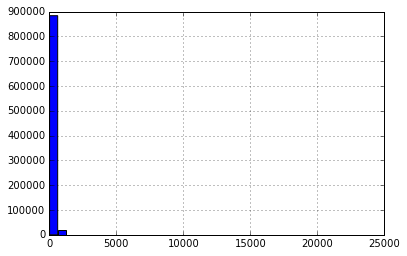

In [13]:
df_npi.bene_count.hist(bins=40)

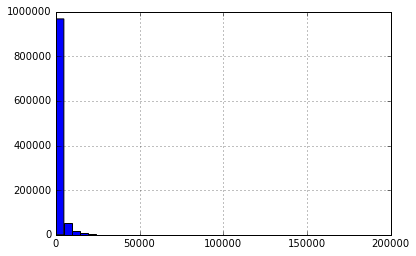

In [14]:
df_npi.total_claim_count.hist(bins=40)

In [15]:
df_npi.total_claim_count.describe()

count    1049381.000000
mean        1303.850100
std         3151.892795
min           11.000000
25%           49.000000
50%          183.000000
75%          956.000000
max       191530.000000
Name: total_claim_count, dtype: float64

In [16]:
df_npi[df_npi['total_claim_count']==191530]

,npi,last_name,first_name,middle_initial,credentials,gender,entity_code,provider_street1,prover_street2,provider_city,...,mapd_claim_cost,pdp_claim_count,pdp_redact_flag,pdp_claim_cost,lis_claim_count,lis_redact_flag,lis_claim_cost,nonlis_claim_count,nonlis_redact_flag,nonlis_claim_cost
421146,1750432969,HURLEY,DANIEL,J,M.D.,M,I,1600 ALBANY ST,SOUTH ENTRANCE GROUND FLOOR,BEECH GROVE,...,1546574.08,162897,NaN,8527932.88,164645,NaN,8804691.47,26885,NaN,1269815.49


In [17]:
# Daniel J. Hurley appears to be an outlier...https://www.propublica.org/article/part-d-prescriber-checkup-mainbar

In [18]:
df_npi_clean = df_npi[df_npi['total_claim_count']!=191530]

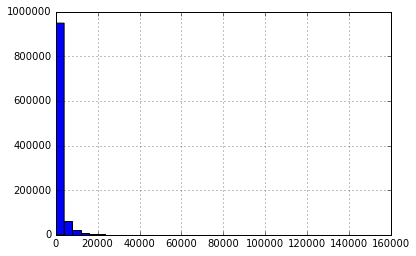

In [20]:
df_npi_clean['total_claim_count'].hist(bins=40)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f8266acac10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8266a20a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8266a34d50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8266a34710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8266acae10>,
  <matplotlib.lines.Line2D at 0x7f8266a20510>]}

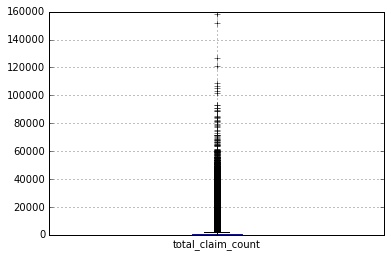

In [41]:
df_npi_clean.boxplot(column = 'total_claim_count')

In [43]:
# Lots of outliers...

#### Explore bene_count nulls

```
bene_count                905381 non-null float64
total_claim_count         1049381 non-null int64
total_drug_cost           1049381 non-null float64
total_day_supply          1049381 non-null int64
bene_count_ge65           598228 non-null float64
bene_count_ge65_redact    451153 non-null object
total_claim_count_ge65    823082 non-null float64
ge65_redact_flag          226299 non-null object
total_drug_cost_ge65      823082 non-null float64
total_day_supply_ge65     823082 non-null float64
brand_claim_count         571130 non-null float64
brand_redact_flag         478251 non-null object
brand_claim_cost          571130 non-null float64
generic_claim_count       758402 non-null float64
generic_redact_flag       290979 non-null object
generic_claim_cost        758402 non-null float64
other_claim_count         756433 non-null float64
other_redact_flag         292948 non-null object
other_claim_cost          756433 non-null float64
mapd_claim_count          809090 non-null float64
mapd_redact_flag          240291 non-null object
mapd_claim_cost           809090 non-null float64
pdp_claim_count           809075 non-null float64
pdp_redact_flag           240306 non-null object
pdp_claim_cost            809075 non-null float64
lis_claim_count           821902 non-null float64
lis_redact_flag           227479 non-null object
lis_claim_cost            821902 non-null float64
nonlis_claim_count        821904 non-null float64
nonlis_redact_flag        227477 non-null object
nonlis_claim_cost         821904 non-null float64
```

In [8]:
df_npi[df_npi['bene_count'].isnull()].describe().T

,count,mean,std,min,25%,50%,75%,max
npi,144000,1.500618e+09,2.881027e+08,1003000175,1.255334e+09,1.497987e+09,1.750352e+09,1.993000e+09
bene_count,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_claim_count,144000,2.857080e+01,2.873775e+01,11,1.400000e+01,1.900000e+01,3.100000e+01,8.880000e+02
total_drug_cost,144000,3.054287e+03,1.740262e+04,0,3.349400e+02,9.631900e+02,2.420692e+03,3.108353e+06
total_day_supply,144000,9.575081e+02,1.086201e+03,11,3.200000e+02,6.040000e+02,1.173000e+03,2.752300e+04
bene_count_ge65,10133,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
total_claim_count_ge65,64091,2.374017e+01,2.599521e+01,0,1.200000e+01,1.700000e+01,2.900000e+01,7.510000e+02
total_drug_cost_ge65,64091,1.907054e+03,6.726124e+03,0,1.658700e+02,7.260800e+02,2.042555e+03,7.658493e+05
total_day_supply_ge65,64091,9.264829e+02,1.072289e+03,0,2.470000e+02,6.020000e+02,1.240000e+03,1.555900e+04
brand_claim_count,51264,8.655002e+00,1.497176e+01,0,0.000000e+00,0.000000e+00,1.400000e+01,3.430000e+02


#### Nulls seem problematic here, when bene_count is null. Indicates fewer than 11 people and leads to a lot of other nulls in the subsequent claim/cost data.  Seems too many records to just toss out, but could possibly justify on business/practicality grounds b/c the cost to govenment is relatively small.  On the other hand, broken windows model would state otherwise.

In [10]:
df_npi[-df_npi['bene_count'].isnull()].describe().T

,count,mean,std,min,25%,50%,75%,max
npi,905381,1.499635e+09,2.878678e+08,1.003000e+09,1.245561e+09,1.497977e+09,1.740573e+09,1.993000e+09
bene_count,905381,1.432203e+02,1.826368e+02,1.100000e+01,3.100000e+01,7.800000e+01,1.910000e+02,2.416400e+04
total_claim_count,905381,1.506682e+03,3.348813e+03,1.100000e+01,8.100000e+01,2.670000e+02,1.284000e+03,1.915300e+05
total_drug_cost,905381,1.139587e+05,2.539813e+05,1.588000e+01,2.584630e+03,1.484011e+04,1.111202e+05,1.660254e+07
total_day_supply,905381,5.798585e+04,1.260016e+05,1.100000e+01,1.378000e+03,6.840000e+03,4.717000e+04,4.339456e+06
bene_count_ge65,588095,1.503218e+02,1.733284e+02,0.000000e+00,4.300000e+01,9.500000e+01,2.020000e+02,2.050000e+04
total_claim_count_ge65,758991,1.320982e+03,2.883868e+03,0.000000e+00,8.100000e+01,2.520000e+02,1.141000e+03,1.661710e+05
total_drug_cost_ge65,758991,8.929375e+04,1.873268e+05,0.000000e+00,2.769660e+03,1.497353e+04,9.113933e+04,9.916113e+06
total_day_supply_ge65,758991,5.369508e+04,1.130394e+05,0.000000e+00,1.535000e+03,7.334000e+03,4.497750e+04,3.792242e+06
brand_claim_count,519866,5.232611e+02,1.039943e+03,0.000000e+00,2.200000e+01,1.060000e+02,6.230000e+02,5.289600e+04


In [16]:
np.sum(df_npi['generic_claim_count']==0)

4745

In [17]:
np.sum(df_npi['brand_claim_count']==0)

93153

#### Seems like nulls represent a non-zero value less than 11, not 'missing'. There are a substantial amount of zeros. Can this be backed up with the number of redact flags? If so, maybe impute a small-ish non-zero number. Also maybe bin for those who have values, 0, and those who will have values imputed. 

In [21]:
np.sum(df_npi['bene_count_ge65'].isnull()) + np.sum(df_npi['bene_count_ge65_redact'].isnull())

1049381

In [23]:
np.sum(df_npi['brand_claim_count'].isnull()) + np.sum(df_npi['brand_redact_flag'].isnull())

1049381

#### What are some other strategies for imputing?  
Calculate a known ratio  
Just an average number (5.5)  


##### Redact flags support that nulls are values under 11, not zero. Flags + non-null values = total count

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7fc4599c4f10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc4599eae50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc458988c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc4599c4cd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc4599ea150>,
  <matplotlib.lines.Line2D at 0x7fc4599ea810>]}

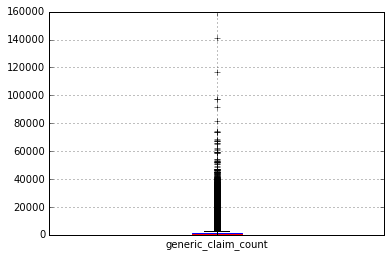

In [18]:
df_npi.boxplot(column = 'generic_claim_count')

In [19]:
df_npi.columns[]

Index([u'npi', u'last_name', u'first_name', u'middle_initial', u'credentials',
       u'gender', u'entity_code', u'provider_street1', u'prover_street2',
       u'provider_city', u'provider_zip', u'provider_state',
       u'provider_country', u'specialty_desc', u'description_flag',
       u'bene_count', u'total_claim_count', u'total_drug_cost',
       u'total_day_supply', u'bene_count_ge65', u'bene_count_ge65_redact',
       u'total_claim_count_ge65', u'ge65_redact_flag', u'total_drug_cost_ge65',
       u'total_day_supply_ge65', u'brand_claim_count', u'brand_redact_flag',
       u'brand_claim_cost', u'generic_claim_count', u'generic_redact_flag',
       u'generic_claim_cost', u'other_claim_count', u'other_redact_flag',
       u'other_claim_cost', u'mapd_claim_count', u'mapd_redact_flag',
       u'mapd_claim_cost', u'pdp_claim_count', u'pdp_redact_flag',
       u'pdp_claim_cost', u'lis_claim_count', u'lis_redact_flag',
       u'lis_claim_cost', u'nonlis_claim_count', u'nonlis_redact_flag

In [35]:
cost_breakdown_list = df_npi[-df_npi['bene_count'].isnull()].describe().columns.values.tolist()

In [37]:
cost_breakdown_list = cost_breakdown_list[1:]

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


{'boxes': [<matplotlib.lines.Line2D at 0x7fc46b717990>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc46b57c890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc46b591a90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc46b591550>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc46b717b50>,
  <matplotlib.lines.Line2D at 0x7fc469f48190>]}

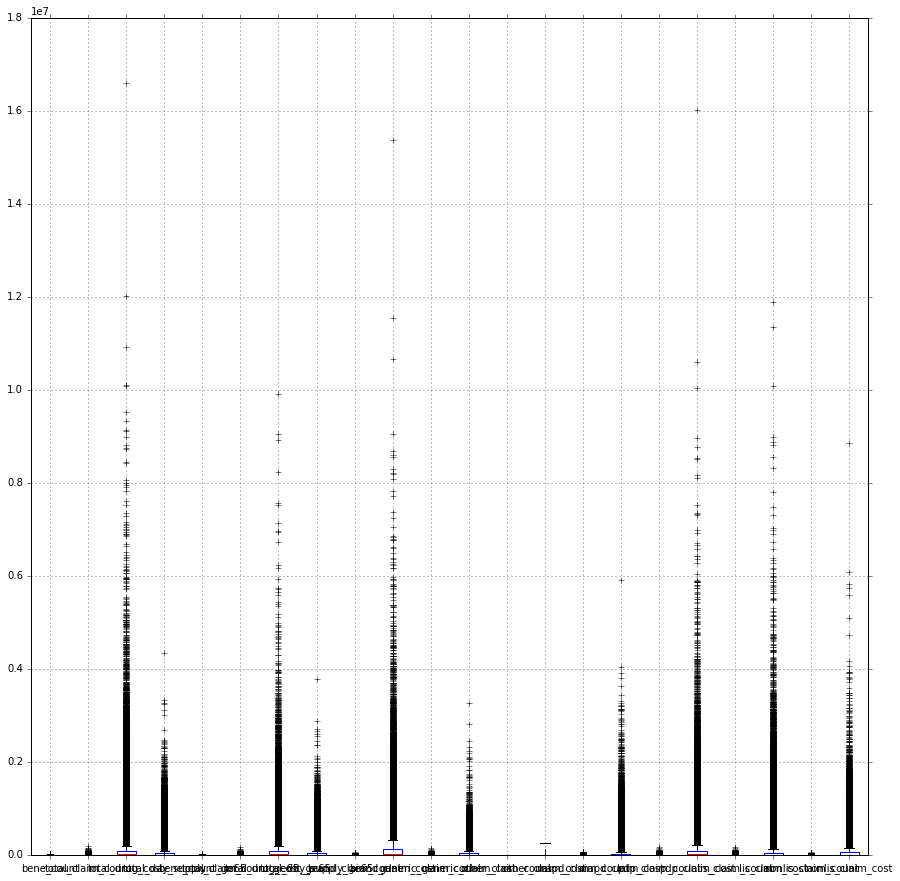

In [53]:
plt.figure(figsize=(15,15))
plt.tick_params(direction='vertical')
df_npi.boxplot(column = cost_breakdown_list)

In [54]:
cost_breakdown_list

['bene_count',
 'total_claim_count',
 'total_drug_cost',
 'total_day_supply',
 'bene_count_ge65',
 'total_claim_count_ge65',
 'total_drug_cost_ge65',
 'total_day_supply_ge65',
 'brand_claim_count',
 'brand_claim_cost',
 'generic_claim_count',
 'generic_claim_cost',
 'other_claim_count',
 'other_claim_cost',
 'mapd_claim_count',
 'mapd_claim_cost',
 'pdp_claim_count',
 'pdp_claim_cost',
 'lis_claim_count',
 'lis_claim_cost',
 'nonlis_claim_count',
 'nonlis_claim_cost']

(0, 6000)

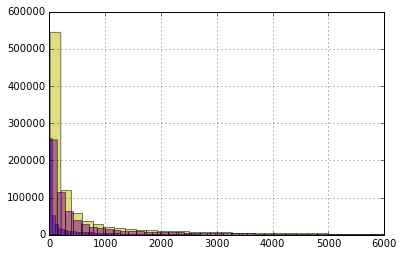

In [63]:
df_npi['total_claim_count'].hist(bins=1000, alpha=.5, color='y')
df_npi['brand_claim_count'].hist(bins=1000, alpha=.5)
df_npi['generic_claim_count'].hist(bins=1000, alpha=.5, color='purple')
plt.xlim(0,6000)

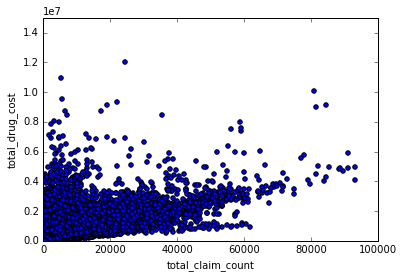

In [67]:
plt.scatter(df_npi['total_claim_count'], df_npi['total_drug_cost'])
plt.xlim(0,100000)
plt.ylim(0,15000000)
plt.xlabel('total_claim_count')
plt.ylabel('total_drug_cost')

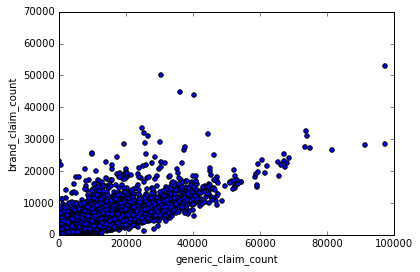

In [72]:
plt.scatter(df_npi['generic_claim_count'], df_npi['brand_claim_count'])
plt.xlim(0,100000)
plt.ylim(0,70000)
plt.xlabel('generic_claim_count')
plt.ylabel('brand_claim_count')

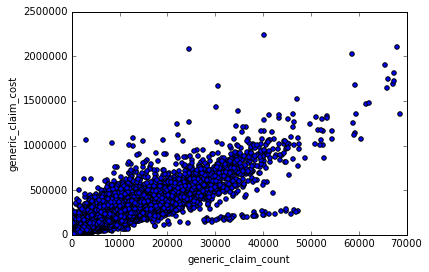

In [82]:
plt.scatter(df_npi['generic_claim_count'], df_npi['generic_claim_cost'])
plt.xlim(0,70000)
plt.ylim(0,2500000)
plt.xlabel('generic_claim_count')
plt.ylabel('generic_claim_cost')

In [94]:
df_npi.head()

,npi,last_name,first_name,middle_initial,credentials,gender,entity_code,provider_street1,prover_street2,provider_city,...,mapd_claim_cost,pdp_claim_count,pdp_redact_flag,pdp_claim_cost,lis_claim_count,lis_redact_flag,lis_claim_cost,nonlis_claim_count,nonlis_redact_flag,nonlis_claim_cost
0,1447268107,10 PARK PHARMACY INC.,None,None,None,None,O,53 E 34TH ST,None,NEW YORK,...,NaN,NaN,#,NaN,0,None,0,18,None,885.23
1,1174856348,"101 FAMILY MEDICAL GROUP,A PROFESSIONAL CORP",None,None,None,None,O,22030 SHERMAN WAY STE 101,None,CANOGA PARK,...,NaN,NaN,#,NaN,NaN,#,NaN,NaN,*,NaN
2,1720181522,"154ST STREET MEDICAL PLAZA, INC.",None,None,None,None,O,5801 MIAMI LAKES DR E,None,MIAMI LAKES,...,NaN,NaN,*,NaN,NaN,*,NaN,NaN,#,NaN
3,1821285826,21ST CENTURY ONCOLOGY LLC,None,None,None,None,O,21150 BISCAYNE BLVD,SUITE 404,AVENTURA,...,NaN,NaN,*,NaN,NaN,*,NaN,NaN,#,NaN
4,1457520132,3 SUNS INVESTMENT INC,None,None,None,None,O,3136 SQUALICUM PKWY,STE. B,BELLINGHAM,...,NaN,NaN,#,NaN,NaN,*,NaN,NaN,#,NaN


In [87]:
len(df_npi.specialty_desc.value_counts())

246

In [295]:
def specialty_avg_cost(col_claim, col_specialty, df):
    '''
    Computes the average cost of drugs per specialty
    Returns original data frame with column added
    '''
    df_cost = df_npi[['{}_cost'.format(col_claim), col_specialty]].groupby(col_specialty).sum()
    df_count = df_npi[['{}_count'.format(col_claim), col_specialty]].groupby(col_specialty).sum()
    avg_cost = df_cost.divide(np.array(df_count), axis=1)
    avg_cost.fillna(np.mean(avg_cost), inplace=True)
    
    return pd.merge(df, avg_cost, how='inner', left_on=col_specialty, right_index=True, suffixes=('','_avg'))

In [296]:
def impute_claim_cost(col_claim, col_specialty, df):
    '''
    Imputes claim costs for all nulls in a column
    '''
    df = specialty_avg_cost(col_claim, col_specialty, df)
    fill_count_null(col_claim, df)
    print df.columns
    mask = df['{}_cost'.format(col_claim)].isnull()
    df['{}_cost'.format(col_claim)][mask] = \
       df['{}_count'.format(col_claim)][mask] * df[mask].iloc[:,-1]
    return df

In [297]:
def fill_count_null(col_claim, df):
    df['{}_count'.format(col_claim)].fillna(5.5, inplace=True)

In [301]:
df_ex = impute_claim_cost('lis_claim', 'specialty_desc', df_npi)

Index([u'npi', u'last_name', u'first_name', u'middle_initial', u'credentials',
       u'gender', u'entity_code', u'provider_street1', u'prover_street2',
       u'provider_city', u'provider_zip', u'provider_state',
       u'provider_country', u'specialty_desc', u'description_flag',
       u'bene_count', u'total_claim_count', u'total_drug_cost',
       u'total_day_supply', u'bene_count_ge65', u'bene_count_ge65_redact',
       u'total_claim_count_ge65', u'ge65_redact_flag', u'total_drug_cost_ge65',
       u'total_day_supply_ge65', u'brand_claim_count', u'brand_redact_flag',
       u'brand_claim_cost', u'generic_claim_count', u'generic_redact_flag',
       u'generic_claim_cost', u'other_claim_count', u'other_redact_flag',
       u'other_claim_cost', u'mapd_claim_count', u'mapd_redact_flag',
       u'mapd_claim_cost', u'pdp_claim_count', u'pdp_redact_flag',
       u'pdp_claim_cost', u'lis_claim_count', u'lis_redact_flag',
       u'lis_claim_cost', u'nonlis_claim_count', u'nonlis_redact_flag

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [299]:
df_npi.columns

Index([u'npi', u'last_name', u'first_name', u'middle_initial', u'credentials',
       u'gender', u'entity_code', u'provider_street1', u'prover_street2',
       u'provider_city', u'provider_zip', u'provider_state',
       u'provider_country', u'specialty_desc', u'description_flag',
       u'bene_count', u'total_claim_count', u'total_drug_cost',
       u'total_day_supply', u'bene_count_ge65', u'bene_count_ge65_redact',
       u'total_claim_count_ge65', u'ge65_redact_flag', u'total_drug_cost_ge65',
       u'total_day_supply_ge65', u'brand_claim_count', u'brand_redact_flag',
       u'brand_claim_cost', u'generic_claim_count', u'generic_redact_flag',
       u'generic_claim_cost', u'other_claim_count', u'other_redact_flag',
       u'other_claim_cost', u'mapd_claim_count', u'mapd_redact_flag',
       u'mapd_claim_cost', u'pdp_claim_count', u'pdp_redact_flag',
       u'pdp_claim_cost', u'lis_claim_count', u'lis_redact_flag',
       u'lis_claim_cost', u'nonlis_claim_count', u'nonlis_redact_flag

In [302]:
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049381 entries, 0 to 984535
Data columns (total 47 columns):
npi                       1049381 non-null int64
last_name                 1049381 non-null object
first_name                1042626 non-null object
middle_initial            775539 non-null object
credentials               1006430 non-null object
gender                    1042626 non-null object
entity_code               1049381 non-null object
provider_street1          1049381 non-null object
prover_street2            439576 non-null object
provider_city             1049381 non-null object
provider_zip              1049381 non-null object
provider_state            1049381 non-null object
provider_country          1049381 non-null object
specialty_desc            1049381 non-null object
description_flag          1049381 non-null object
bene_count                905381 non-null float64
total_claim_count         1049381 non-null int64
total_drug_cost           1049381 non-null